In [61]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
#from google.colab import drive
#drive.mount("/content/gdrive")

In [63]:
#URL='/content/gdrive/My Drive/Verzeo/Mini Assignment/movies.csv'
URL='movies.csv'
data = pd.read_csv(URL)
data.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Preprocessing

In [64]:
delete_columns=['id','popularity','homepage','tagline','overview','keywords','vote_count','vote_average','budget_adj','revenue_adj']
data.drop(delete_columns,axis=1,inplace=True)
data.head(6)

,imdb_id,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,tt1392190,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,tt2908446,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,tt2820852,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015
5,tt1663202,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,2015


In [65]:
print("Total No of Rows in data are  ",len(data))

Total No of Rows in data are   10866


In [66]:
data=data.drop_duplicates(subset='imdb_id',keep='first')
print("Total No of Rows in data are  ",len(data))

Total No of Rows in data are   10856


In [67]:
#check whether all the Id's are Unique or not
data.imdb_id.unique().shape[0]

10856

In [68]:
#quick snap of Null and Non Null Values in the present dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   imdb_id               10855 non-null  object
 1   budget                10856 non-null  int64 
 2   revenue               10856 non-null  int64 
 3   original_title        10856 non-null  object
 4   cast                  10780 non-null  object
 5   director              10815 non-null  object
 6   runtime               10856 non-null  int64 
 7   genres                10835 non-null  object
 8   production_companies  9831 non-null   object
 9   release_date          10856 non-null  object
 10  release_year          10856 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1017.8+ KB


In [69]:
#check the Presence of NA in IMDB_ID Cols
data.imdb_id.isna().any()

True

In [70]:
#drop the movie which do not have any IMDB id at all
data.imdb_id.dropna(inplace=True)

In [71]:
#recheck the Presence of NA in IMDB_ID Cols
data.imdb_id.isna().any()

False

In [72]:
#check the Total Na values present in Each data columns
data.isnull().sum()

imdb_id                    1
budget                     0
revenue                    0
original_title             0
cast                      76
director                  41
runtime                    0
genres                    21
production_companies    1025
release_date               0
release_year               0
dtype: int64

So From This Point We're Done With Out Data Cleaning Part And rest Other Cleaning Part is Done according to the Question to maintain the acccuracy of answers

# Ques 1: Which are the movies with the third lowest and third highest budget?

In [73]:
data1=data[data.budget != 0]
data1.budget.isna().values.any()

False

In [74]:
#Movie with 3rd largest budget in Hollywood
ans_1=data1.loc[data1.budget.drop_duplicates().nlargest(5).index[2]]
ans_1

imdb_id                                                         tt0449088
budget                                                          300000000
revenue                                                         961000000
original_title                   Pirates of the Caribbean: At World's End
cast                    Johnny Depp|Orlando Bloom|Keira Knightley|Geof...
director                                                   Gore Verbinski
runtime                                                               169
genres                                           Adventure|Fantasy|Action
production_companies    Walt Disney Pictures|Jerry Bruckheimer Films|S...
release_date                                                      5/19/07
release_year                                                         2007
Name: 7387, dtype: object

In [75]:
print("Movie with 3rd largest budget in Hollywood ---------------------->")
print(ans_1.original_title)

Movie with 3rd largest budget in Hollywood ---------------------->
Pirates of the Caribbean: At World's End


In [76]:
#other Movies with same budget are 
data[data.budget == data1.budget.drop_duplicates().nlargest(10).iloc[2]]

,imdb_id,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
7387,tt0449088,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2007


In [77]:
#Movie with third lowest Budget In Hollywood is
ans_1_b=data.loc[data1.budget.drop_duplicates().nsmallest(5).index[2]]
ans_1_b

imdb_id                                                         tt1560139
budget                                                                  3
revenue                                                                43
original_title                                                        Boy
cast                    James Rolleston|Craig Hall|Taika Waititi|Te Ah...
director                                                    Taika Waititi
runtime                                                                87
genres                                                       Drama|Comedy
production_companies    New Zealand Film Commission|Unison Films|Whenu...
release_date                                                      2/14/10
release_year                                                         2010
Name: 2398, dtype: object

In [78]:
print("Movie with 3rd lowest budget in Hollywood ---------------------->")
print(ans_1_b.original_title)

Movie with 3rd lowest budget in Hollywood ---------------------->
Boy


In [79]:
#other Movies with same budget are 
data[data.budget == data1.budget.drop_duplicates().nsmallest(5).iloc[2]].original_title

2398                                    Boy
3765                   Death of a Superhero
10050    Tales from the Darkside: The Movie
Name: original_title, dtype: object

# Ques 2: What is the average number of words in movie titles between the year 2000-2005?

In [80]:
data2=data[(data.release_year >2000) & (data.release_year <2005)].original_title
data2.isna().any()

False

In [81]:
data2.head()

2633    The Lord of the Rings: The Fellowship of the Ring
2634             Harry Potter and the Philosopher's Stone
2635                                     Mulholland Drive
2636                                         Donnie Darko
2637                                       Monsters, Inc.
Name: original_title, dtype: object

In [82]:
answer_2= data2.str.split().apply(len).mean()
print("The average number of words in movie titles between the year 2000-2005  is -------------    ",answer_2)

The average number of words in movie titles between the year 2000-2005  is -------------     2.8731751824817517


# Question 3 : What is the most common Genre for Vin Diesel & Emma Watson movies

In [83]:
def fil(a):
  #a=a.split('|')
  try:
    if 'Vin Diesel'in a :
      return True
    else:
      return False
  except:
    return False

In [84]:
d=data.cast.str.split('|').apply(fil)
data3_vin=data[d]
len(data[d])

22

In [85]:
temp_vin="|".join(data3_vin.genres)
temp_vin

'Action|Crime|Thriller|Fantasy|Action|Adventure|Action|Science Fiction|Adventure|Action|Crime|Drama|Thriller|Action|Drama|Adventure|Animation|Family|Fantasy|Science Fiction|Action|Crime|Thriller|Crime|Thriller|Action|Adventure|Science Fiction|Thriller|Action|Thriller|Crime|Action|Action|Drama|Action|Science Fiction|Action|Thriller|Action|Thriller|Crime|Action|Animation|Science Fiction|Action|Comedy|Drama|Family|Thriller|Drama|Action|Comedy|Crime|Adventure|Action|Thriller|Science Fiction|Action|Animation|Science Fiction|Thriller|Thriller|Science Fiction|Action|Crime|Drama|Thriller'

In [86]:
ans_3_a=Counter(temp_vin.split('|')).most_common(6)
ans_3_a=[*dict(ans_3_a)]
ans_3_a

['Action', 'Thriller', 'Crime', 'Science Fiction', 'Drama', 'Adventure']

In [87]:
def fill(a):
  #a=a.split('|')
  try:
    if 'Emma Watson'in a :
      return True
    else:
      return False
  except:
    return False

In [88]:
d2=data.cast.str.split('|').apply(fill)
data3_emma=data[d2]
len(data3_emma)

14

In [89]:
data3_emma.head(3)

,imdb_id,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
146,tt3319920,0,17671101,Regression,Ethan Hawke|Emma Watson|Aaron Ashmore|Devon Bo...,Alejandro AmenÃ¡bar,106,Horror|Mystery|Thriller,The Weinstein Company|HimenÃ³ptero|First Gener...,10/1/15,2015
686,tt1959490,125000000,362637473,Noah,Russell Crowe|Jennifer Connelly|Emma Watson|Lo...,Darren Aronofsky,139,Drama|Adventure,Paramount Pictures|Regency Enterprises|Protozo...,3/20/14,2014
1389,tt0417741,250000000,933959197,Harry Potter and the Half-Blood Prince,Daniel Radcliffe|Rupert Grint|Emma Watson|Tom ...,David Yates,153,Adventure|Fantasy|Family,Warner Bros.|Heyday Films,7/7/09,2009


In [90]:
temp_emma="|".join(data3_emma.genres)
temp_emma

'Horror|Mystery|Thriller|Drama|Adventure|Adventure|Fantasy|Family|Adventure|Fantasy|Family|Adventure|Fantasy|Family|Animation|Comedy|Family|Adventure|Family|Fantasy|Adventure|Fantasy|Family|Drama|Romance|Drama|Crime|Adventure|Fantasy|Family|Adventure|Fantasy|Family|Adventure|Fantasy|Family|Mystery|Drama|Family'

In [91]:
ans_3_b=Counter(temp_emma.split('|')).most_common(6)
ans_3_b=[*dict(ans_3_b)]
ans_3_b

['Family', 'Adventure', 'Fantasy', 'Drama', 'Mystery', 'Horror']

In [92]:
print("the most common Genre for Vin Diesel -------------\t","  |  ".join(ans_3_a))
print("the most common Genre for Emma Watson --------------\t","  |  ".join(ans_3_b))

the most common Genre for Vin Diesel -------------	 Action  |  Thriller  |  Crime  |  Science Fiction  |  Drama  |  Adventure
the most common Genre for Emma Watson --------------	 Family  |  Adventure  |  Fantasy  |  Drama  |  Mystery  |  Horror


In [93]:
print("The Most common Genres between Emma Wayson an d Vin Desial are --------------\t","  |  ".join(list(set(ans_3_a).intersection(set(ans_3_b)))))

The Most common Genres between Emma Wayson an d Vin Desial are --------------	 Drama  |  Adventure


# Ques 4: Which are the movies with most and least earned revenue?

In [94]:
data4=data[data.revenue != 0]
data4.revenue.isna().values.any()

False

In [95]:
#Maximum Revenue Earning Movie is :
answer_4_a=data4[data4.revenue == data4.revenue.max()]
answer_4_a 

,imdb_id,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
1386,tt0499549,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,2009


In [96]:
print("Maximum Revenue Earning Movie is -------------\t",answer_4_a.original_title)

Maximum Revenue Earning Movie is -------------	 1386    Avatar
Name: original_title, dtype: object


In [97]:
#Least Revenue Earning Movie is :
answer_4_b=data4[data4.revenue == data4.revenue.min()]
answer_4_b

,imdb_id,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
5067,tt0323944,6000000,2,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,11/14/03,2003
8142,tt0113749,6000000,2,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,10/20/95,1995


In [98]:
print("Least Revenue Earning Movie is -------------\n",answer_4_b.original_title)

Least Revenue Earning Movie is -------------
 5067    Shattered Glass
8142           Mallrats
Name: original_title, dtype: object


## Alternative answers

In [99]:
#top 10 -Movies With Least Revenue of the average runtime of movies in the year 2006All Time
A4_alt_min=data4.loc[data4.revenue.nsmallest(10).index]
print("top 10 -Movies With Least Revenue of All Time----------------\n")
print(A4_alt_min.original_title)

top 10 -Movies With Least Revenue of All Time----------------

5067                    Shattered Glass
8142                           Mallrats
1380                       The Sentinel
3239     Dr. Horrible's Sing-Along Blog
10607                     Soylent Green
5162                        Kid's Story
8523                  Bordello of Blood
8226            Never Talk to Strangers
10307          The House of the Spirits
3283                    Parlami D'Amore
Name: original_title, dtype: object


In [100]:
#top 10 -Movies With Most Revenue of All Time
A4_alt_max =data4.loc[data4.revenue.nlargest(10).index]
print("top 10 -Movies With Most Revenue of All Time----------------\n")
print(A4_alt_max.original_title)

top 10 -Movies With Most Revenue of All Time----------------

1386                                          Avatar
3                       Star Wars: The Force Awakens
5231                                         Titanic
4361                                    The Avengers
0                                     Jurassic World
4                                          Furious 7
14                           Avengers: Age of Ultron
3374    Harry Potter and the Deathly Hallows: Part 2
5422                                          Frozen
5425                                      Iron Man 3
Name: original_title, dtype: object


## Ques5 : What is the average runtime of movies in the year 2006?

In [101]:
#Filterout The Movies which are released in 2006 , then count the Runtime of each movie the find Mean
answer_5=data[data.release_year == 2006].runtime.mean()
answer_5

101.68382352941177

In [102]:
print("the average runtime of movies in the year 2006 ---------\t",answer_5,"  mins")

the average runtime of movies in the year 2006 ---------	 101.68382352941177   mins


## Ques 6:  Name any 3 production companies which have invested money in worse revenue movies?

In [103]:
array=data4.loc[data4.revenue.nsmallest(3).index].production_companies.str.split('|').array
array

<PandasArray>
[['Lions Gate Films', 'Cruise/Wagner Productions', 'Baumgarten Merims Productions'],
                ['Gramercy Pictures', 'Alphaville Films', 'View Askew Productions'],
                                                             ['Universal Pictures']]
Length: 3, dtype: object

In [104]:
print("3 production companies which have invested money in worse revenue movies are \n",array[0])

3 production companies which have invested money in worse revenue movies are 
 ['Lions Gate Films', 'Cruise/Wagner Productions', 'Baumgarten Merims Productions']


# **Fun Facts**

In [105]:
data_pre = data[(data.budget >0) & (data.revenue > 0)]
data_x = data_pre.budget.mean()
data_y = data_pre.revenue.mean()
#data_z = data_pre[abs(data_pre.budget - data_pre.revenue)< 5000000].budget.mean()

In [106]:
data_x,data_y

(37203696.954852104, 107686616.09807992)

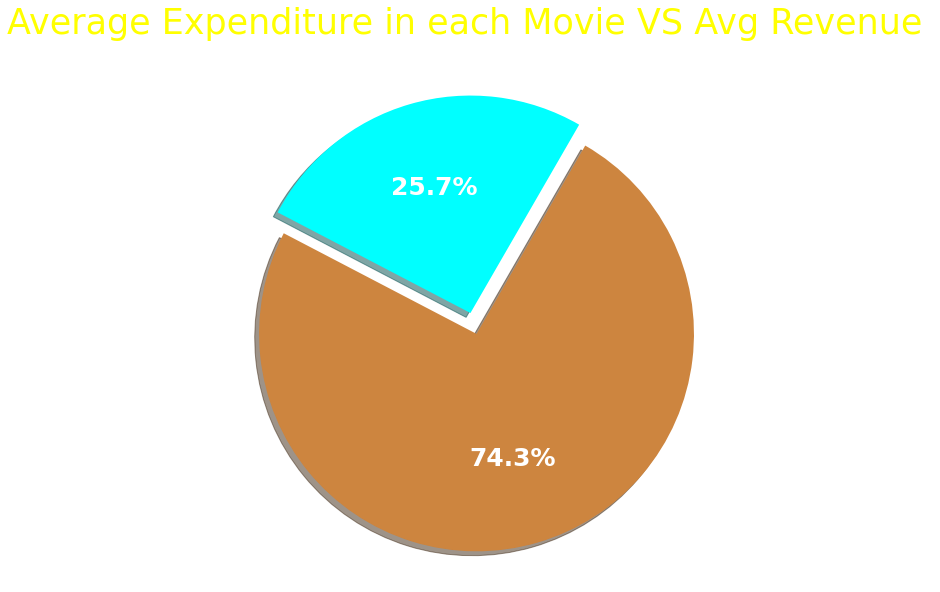

In [107]:
plt.figure(figsize=(10,10))
plt.title("Average Expenditure in each Movie VS Avg Revenue ",fontdict={'fontsize':35,'color':'yellow'})
_,_,at=plt.pie([data_x,data_y],labels=["Avg Budget","Avg Revenue"],autopct='%1.1f%%',shadow=True,explode=(0,0.1),startangle=60,colors=['aqua','peru'],textprops={"color":"w","size":25})
plt.setp(at,size=25,weight='bold')
plt.show()

In [108]:
d_g= data.genres.dropna()
movie_genres="|".join(d_g)
movie_genres=dict(Counter(movie_genres.split('|')))
genre_ti=list(movie_genres.keys())
genre_val=list(movie_genres.values())

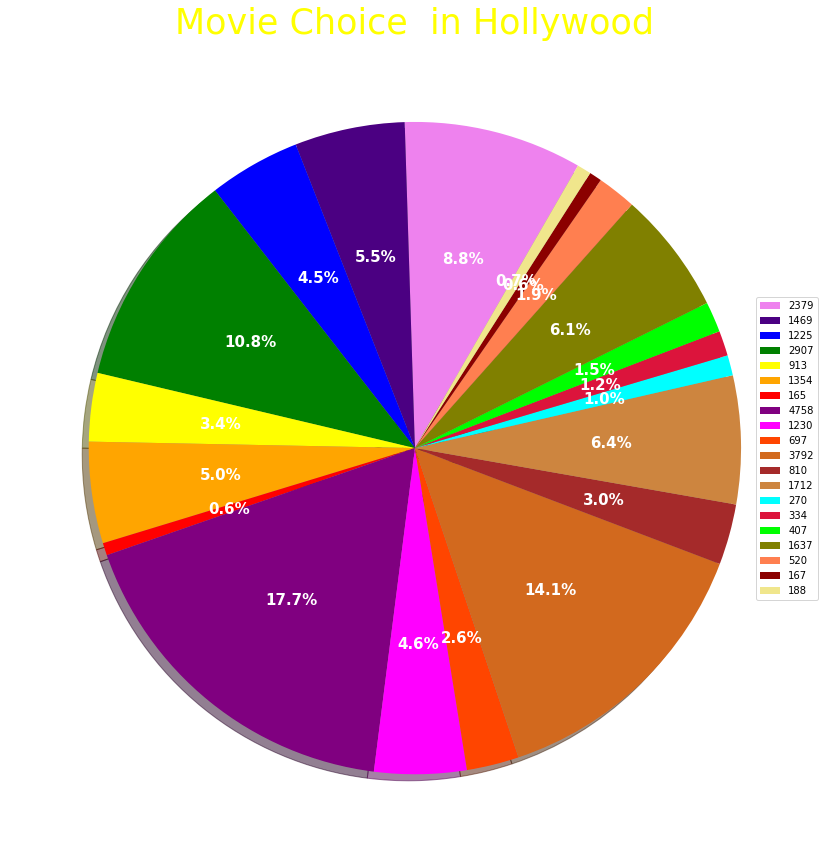

In [109]:
col=['violet','indigo','blue','green','yellow','orange','red','purple','magenta','orangered','chocolate','brown','peru','aqua','crimson','lime','olive','coral','darkred','khaki']
plt.figure(figsize=(15,15))
plt.title("Movie Choice  in Hollywood",fontdict={'fontsize':35,'color':'yellow'})
pat,_,at=plt.pie(genre_val,labels=genre_ti,autopct='%1.1f%%',shadow=True,startangle=60,colors=col,textprops={"color":"w","size":10})
plt.setp(at,size=15,weight='bold')
plt.legend(pat,genre_val,loc=5)
plt.show()

In [110]:
data.head(1)

,imdb_id,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015


<Figure size 2160x720 with 0 Axes>

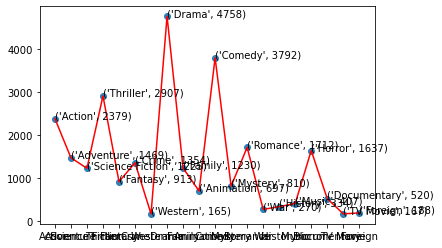

In [111]:
plt.figure(figsize=(30,10))
fig, ax = plt.subplots()
ax.scatter(genre_ti,genre_val,alpha=0.9)
plt.plot(genre_ti,genre_val,color='r')

for i, txt in enumerate(genre_val):
  p=(genre_ti[i], genre_val[i])
  ax.annotate(p, (genre_ti[i], genre_val[i]))

plt.show()

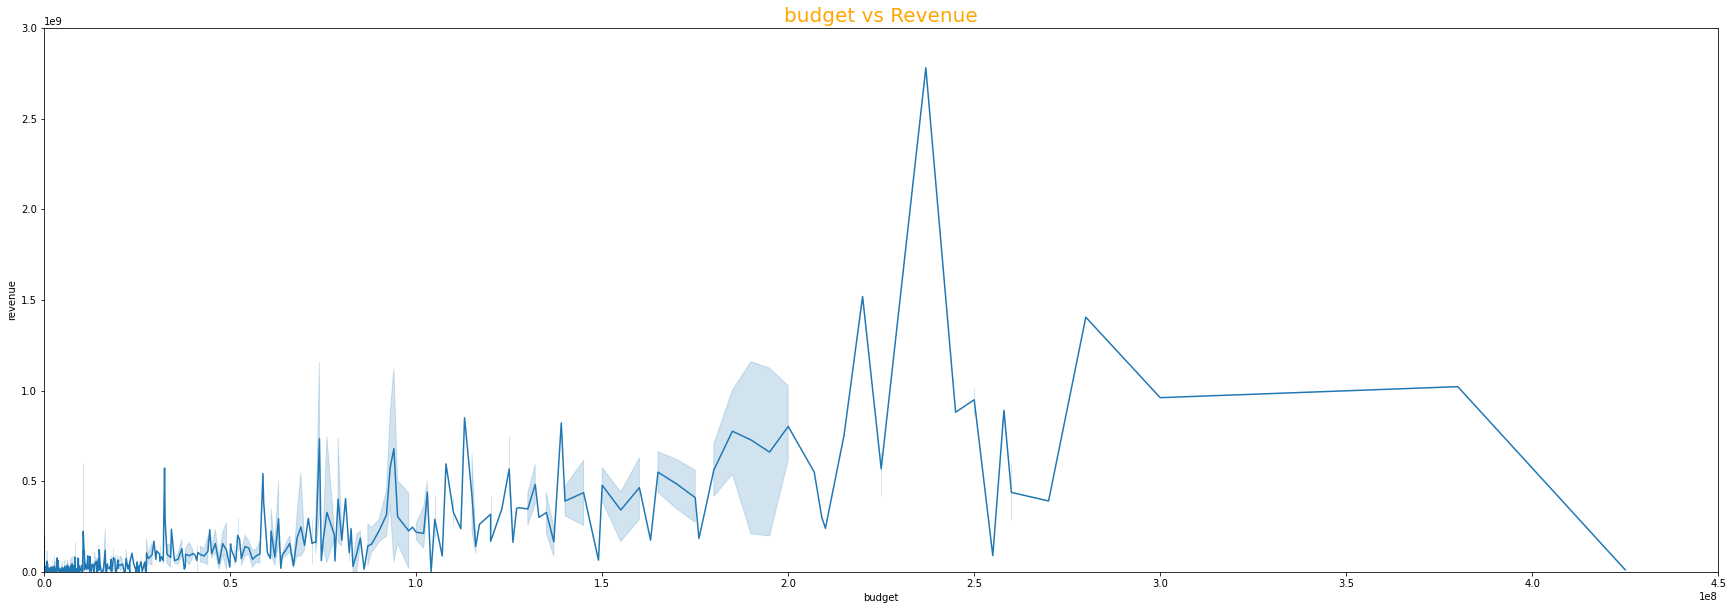

In [112]:
plt.figure(figsize=(30,10))
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
plt.title("budget vs Revenue",fontdict={'fontsize':20,'color':'orange'})
sns.lineplot(x='budget',y='revenue',data=data,sizes=(.25, 2.5))
plt.show()